### TP 3

Implementar la función create_gauss_filter(h, w, k_size, sigma) para crear filtros gaussianos para
filtrado espectral. Debe retornar un filtro gaussiano de tamaño HxW en dominio espacial y su transformada
de Fourier.
1. Graficar ambas representaciones para diferentes tamaños de kernel y sigma. Aplicar el filtro una
imagen para validar el funcionamiento en el dominio espectral.
2. Usando el método descripto en el paper “Image Sharpness Measure for Blurred Images in Frequency
Domain” comparar el resultado de un filtrado por convolución con el filtrado espectral.
3. Repetir la comparación usando uno de los métodos descriptos en el apéndice del paper “Analysis of
focus measure operators in shape-from-focus”

In [5]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
%matplotlib inline

#### FILTRADO ESPECTRAL

In [6]:
def create_gauss_filter(h,w,k_size,sigma):
    # creo un filtro gaussiano
    gauss_kernel = cv.getGaussianKernel(k_size, sigma)
    # aplicar filtro
    gauss_filter = np.outer(gauss_kernel, gauss_kernel)
    # fourier trasnform
    gauss_filter_fft = np.fft.fft2(gauss_filter)
    return gauss_filter, gauss_filter_fft


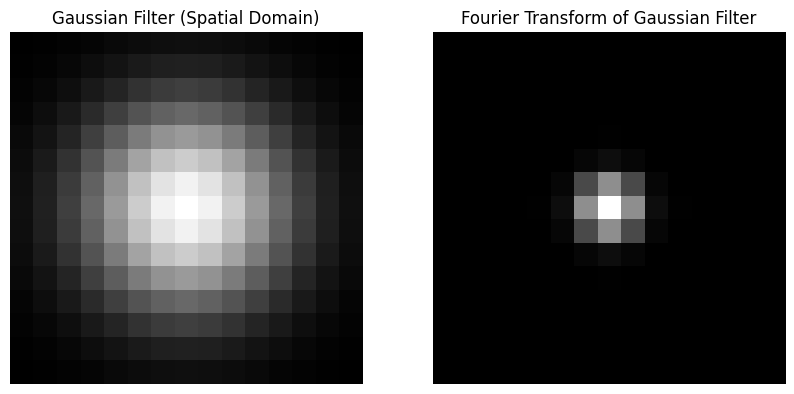

In [7]:
h, w = 100, 100  # Size of the filter
k_size = 15      # Size of the Gaussian kernel
sigma = 3        # Standard deviation of the Gaussian kernel

gauss_filter, gauss_filter_fft = create_gauss_filter(h, w, k_size, sigma)

# Display the Gaussian filter and its Fourier transform
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(gauss_filter, cmap='gray')
plt.title('Gaussian Filter (Spatial Domain)')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(np.log(1 + np.abs(np.fft.fftshift(gauss_filter_fft))), cmap='gray')
plt.title('Fourier Transform of Gaussian Filter')
plt.axis('off')

plt.show()

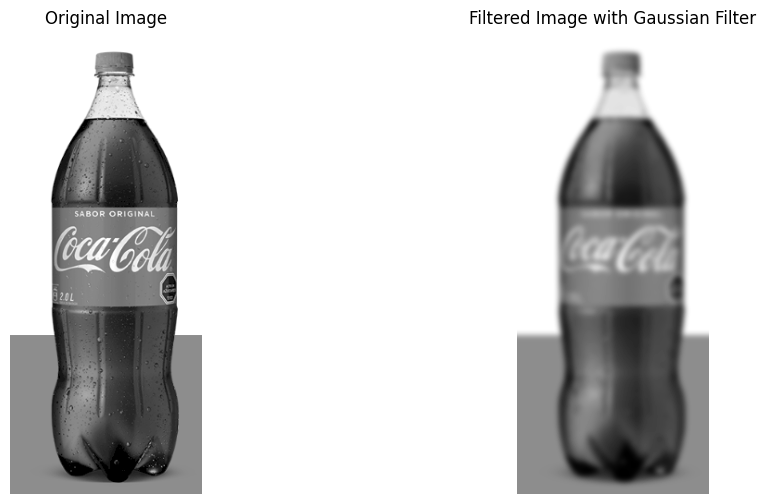

In [12]:
# Load the image
image = cv.imread('./TP3/images/coca_logo_1.png', cv.IMREAD_GRAYSCALE)

# Parameters for Gaussian filter
h, w = image.shape
k_size = 15      # Size of the Gaussian kernel
sigma = 3        # Standard deviation of the Gaussian kernel

# Create Gaussian filter
gauss_filter, _ = create_gauss_filter(h, w, k_size, sigma)

# Apply the filter to the image
filtered_image = cv.filter2D(image, -1, gauss_filter)

# Plot the original and filtered images
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(filtered_image, cmap='gray')
plt.title('Filtered Image with Gaussian Filter')
plt.axis('off')

plt.show()

2. Usando el método descripto en el paper “Image Sharpness Measure for Blurred Images in Frequency
Domain” comparar el resultado de un filtrado por convolución con el filtrado espectral.
3. Repetir la comparación usando uno de los métodos descriptos en el apéndice del paper “Analysis of
focus measure operators in shape-from-focus”

#### FILTRADO CONVOLUCIONAL

#### MEDICIÓN DE BLURRINESS DE LAS IMAGENES PROPUESTA EN EL PAPER

## Algorithm for Image Quality Measure (FM)

This algorithm calculates the image quality measure (FM) of an image using the frequency domain. Higher FM values indicate better image quality (less blur).

**Input:**

* Image I of size M×N (numpy array)

**Output:**

* Image quality measure (FM)

**Steps:**

1. **Compute Fourier Transform (F):**
   - Calculate the Fast Fourier Transform (FFT) of the image I.

2. **Find Centered Fourier Transform (Fc):**
   - Shift the origin of F to the center using `fftshift`. This puts the low-frequency components in the center.

3. **Absolute Value (AF):**
   - Calculate the absolute value of the centered Fourier transform (Fc).

4. **Maximum Frequency Component (M):**
   - Find the maximum value in the absolute value array (AF).

5. **Threshold (thres):**
   - Set a threshold value (thres) as a proportion of the maximum value (M) - typically M/1000.

6. **Count High-Frequency Pixels (TH):**
   - Count the number of pixels in AF that are greater than the threshold (thres). These pixels correspond to high-frequency components in the image, which are less affected by blur.

7. **Image Quality Measure (FM):**
   - Calculate the FM using the following equation:
FM = T/(M*N)


In [28]:
from scipy.fft import fft2, fftshift

def quality_measure(img):
    f = fft2(img)
    fc = fftshift(f)
    af = np.abs(fc)
    m = np.max(af)
    thres = m/1000
    th = np.sum(af > thres)
    fm = th / (img.shape[0] * img.shape[1])
    return fm

In [29]:
quality_measure(image)

0.04068599033816425

Repetir la comparación usando uno de los métodos descriptos en el apéndice del paper “Analysis of
focus measure operators in shape-from-focus”